In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 1.5MB/s 
     |████████████████████████████████| 983kB 37.3MB/s 
     |████████████████████████████████| 266kB 44.3MB/s 
     |████████████████████████████████| 1.3MB 44.4MB/s 
     |████████████████████████████████| 471kB 42.5MB/s 
     |████████████████████████████████| 890kB 43.1MB/s 
     |████████████████████████████████| 2.9MB 43.3MB/s 
     |████████████████████████████████| 1.1MB 48.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.24.2-cp36-none-any.whl size=25274084 sha256=c6f7f83af56aacd79f85603aa20465250b313032e614b3d5e6daf29648c0d171
  Stored in directory: /root/.cache/pip/wheels/44/99/e6/dbdddf5f4890a87e98dc25664f7f1a42b0e83081e1de39b47c
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=158583e610cd76ee4f7342c44ca1790a55c0c51f7282c61c738200e5daaf8ed0
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [3]:
data=pd.read_csv('/content/TrumpvsBiden.csv')

In [4]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=1234)

In [5]:
(X_train,y_train),(X_test,y_test),preprocess=text.texts_from_df(train_df=data_train,
                                                                text_column='text',
                                                                label_columns='Sentiment',
                                                                val_df=data_test,
                                                                maxlen=400,
                                                                preprocess_mode='bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [6]:
model=text.text_classifier(name='bert',
                           train_data=(X_train,y_train),
                           preproc=preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [7]:
learner = ktrain.get_learner(model, train_data=(X_train, y_train), batch_size=6)

In [9]:
learner.fit_onecycle(lr=2e-5, epochs=4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
302/302 [==============================] - 8320s 28s/step - loss: 0.5985 - accuracy: 0.6796
Epoch 2/4
302/302 [==============================] - 8336s 28s/step - loss: 0.3800 - accuracy: 0.8403
Epoch 3/4
302/302 [==============================] - 8368s 28s/step - loss: 0.1415 - accuracy: 0.9453
Epoch 4/4
302/302 [==============================] - 8378s 28s/step - loss: 0.0279 - accuracy: 0.9923


In [13]:
predictor = ktrain.get_predictor(learner.model, preprocess)
predictor.save('/content/drive/My Drive/bert')

In [26]:
y_pred=predictor.predict(list(data_test['text']))
y_pred

['negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',

In [29]:
print(classification_report(data_test['Sentiment'], y_pred, target_names=['negative','positive']))

              precision    recall  f1-score   support

    negative       0.86      0.82      0.84       165
    positive       0.90      0.92      0.91       288

    accuracy                           0.89       453
   macro avg       0.88      0.87      0.88       453
weighted avg       0.88      0.89      0.88       453



In [34]:
class_names=['negative','positive']

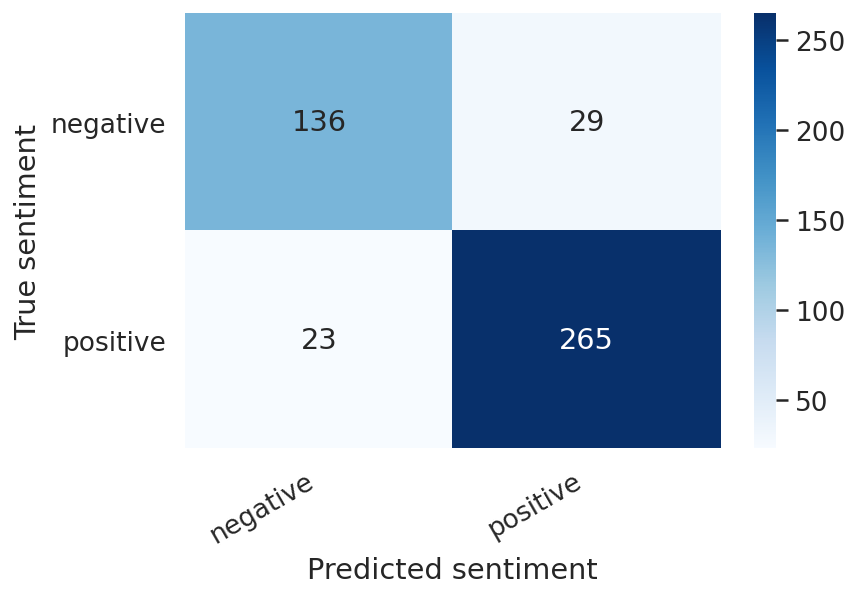

In [37]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(data_test['Sentiment'], y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)